**Required Import**

In [2]:
#from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from pathlib import Path
from ipywidgets import widgets
from IPython.display import display
import io

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

**Mount Data from Google Drive**

In [4]:
#drive.mount('/content/drive/')

**Determine the Braille Image Folder Path**

In [6]:
braille_images_folder = 'Braille Dataset/Braille Dataset'

**Using Path from Pathlib to Search for .jpg Image Files**

In [8]:
image_dir = Path(braille_images_folder)

**Filter .jpg Files from Folder**

In [10]:
dir_list = list(image_dir.glob('*.jpg'))

**Counting the Number of Images**

In [12]:
image_count = len(dir_list)
print(f'Jumlah gambar: {image_count}')

Jumlah gambar: 1560


**Showing Sample Images**

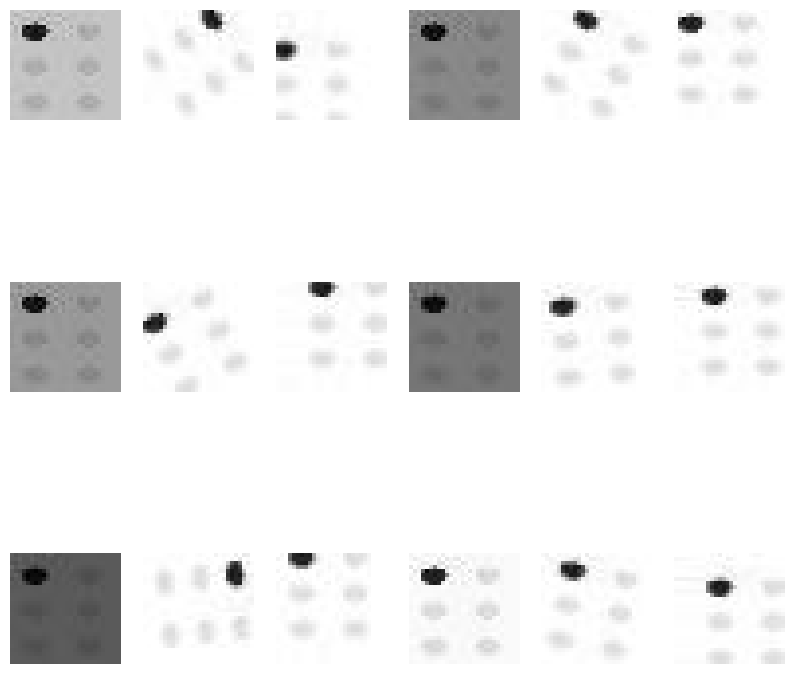

In [14]:
num_images = min(18, image_count)

plt.figure(figsize=(10, 10))

for i in range(num_images):
    img_path = dir_list[i]
    img = Image.open(img_path)
    plt.subplot(3, 6, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

**Checking Image Dimensions**

In [16]:
sample_array = tf.keras.preprocessing.image.img_to_array(img)
print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (28, 28, 3)


In [17]:
sample_array[0,:5]

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [254., 254., 254.]], dtype=float32)

**Preprocessing Gambar**

Convert image into grayscale and normalize the image to [0,1]

In [19]:
img_height, img_width = 64, 64

def preprocess_image(img_path):
    img = Image.open(img_path).convert('L')
    img = img.resize((img_height, img_width))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=-1)
    return img_array

Convert all images to preprocessed arrays

In [21]:
data = []
labels = []
for img_path in dir_list:
    img_array = preprocess_image(img_path)
    data.append(img_array)
    label = img_path.stem[0]
    labels.append(ord(label) - ord('a'))

data = np.array(data)
labels = np.array(labels)

**Split the Dataset**

In [23]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes=26)
y_val = to_categorical(y_val, num_classes=26)

**CNN Model Architecture**

In [25]:
model = Sequential([
    Input(shape=(img_height, img_width, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.4),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │        13,338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,498,842 (9.53 MB)

 Trainable params: 2,498,842 (9.53 MB)

 Non-trainable params: 0 (0.00 B)

**Compile the Model**

In [28]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Data Augmentation**

Uses ImageDataGenerator to apply augmentations such as rotation, shifting, and zoom to improve model performance with limited data.

In [30]:
data_augment = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

data_augment.fit(X_train)

**Train the Model**

In [32]:
history = model.fit(
    data_augment.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=70)

Epoch 1/70


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.0286 - loss: 3.3278 - val_accuracy: 0.0256 - val_loss: 3.2597
Epoch 2/70
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0404 - loss: 3.2573 - val_accuracy: 0.0288 - val_loss: 3.2602
Epoch 3/70
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0409 - loss: 3.2575 - val_accuracy: 0.0256 - val_loss: 3.2617
Epoch 4/70
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0318 - loss: 3.2583 - val_accuracy: 0.0256 - val_loss: 3.2622
Epoch 5/70
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.0444 - loss: 3.2573 - val_accuracy: 0.0288 - val_loss: 3.2629
Epoch 6/70
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0352 - loss: 3.2575 - val_accuracy: 0.0256 - val_loss: 3.2634
Epoch 7/70
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.0413 - loss: 3.2586 - val_accuracy: 0.0256 - val_loss: 3.2648
Epoch 8/70
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.0446 - loss: 3.2579 - val_accuracy: 0.0256 - val_loss: 3.

**Evaluate the Model**

In [34]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9973 - loss: 0.0252
Validation Accuracy: 99.68%


**Prediction Function**

In [36]:
def predict_braille_image(img_path, model):
    img_array = preprocess_image(img_path)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_label = chr(97 + class_index)
    return class_label

sample_image_path = dir_list[0]
predicted_label = predict_braille_image(sample_image_path, model)
print(f"Predicted letter: {predicted_label}")

sample_image_path = dir_list[61]
predicted_label = predict_braille_image(sample_image_path, model)
print(f"Predicted letter: {predicted_label}")

sample_image_path = dir_list[130]
predicted_label = predict_braille_image(sample_image_path, model)
print(f"Predicted letter: {predicted_label}")

sample_image_path = dir_list[550]
predicted_label = predict_braille_image(sample_image_path, model)
print(f"Predicted letter: {predicted_label}")

sample_image_path = dir_list[1000]
predicted_label = predict_braille_image(sample_image_path, model)
print(f"Predicted letter: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted letter: a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted letter: b
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted letter: c
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted letter: j
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted letter: q


In [37]:
model.save('final/braille_model.h5')

**Visualize Model Performance**

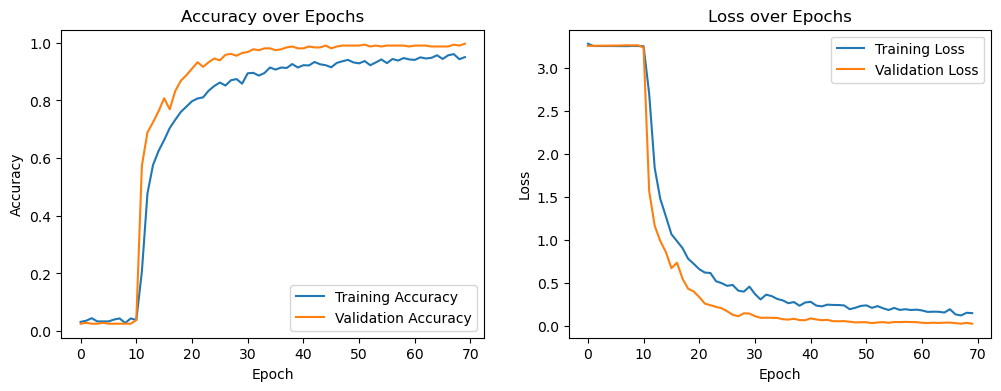

In [39]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')

plt.show()

**Image Upload and Prediction Widget**

In [41]:
def on_image_upload(change):
    uploaded_files = change['new']
    for filename, file_info in uploaded_files.items():

        img = Image.open(io.BytesIO(file_info['content'])).convert('L')
        img = img.resize((img_height, img_width))

        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=-1)
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        class_index = np.argmax(prediction)
        predicted_label = chr(97 + class_index)

        print(f"Predicted letter: {predicted_label}")

upload_widget = widgets.FileUpload(
    accept='.jpg, .jpeg, .png',
    multiple=False
)

upload_widget.observe(on_image_upload, names='value')
display(upload_widget)

FileUpload(value={}, accept='.jpg, .jpeg, .png', description='Upload')